# **3.2 Regression Task [100]:**

**1. Exploratory Data Analysis and Data Understanding [20]:**

1. Choosing a Dataset:

• Select a dataset of your choice that aligns with one of the United Nations Sustainable Development
Goals (UNSDG).

• Load the dataset into a pandas DataFrame.

---



In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/Final/electricity_cost_dataset.csv")

print("Shape of dataset:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nInfo:\n")
print(data.info())
print("\nSummary statistics:\n", data.describe())

Shape of dataset: (10000, 9)

First 5 rows:
    site area structure type  water consumption  recycling rate  \
0       1360      Mixed-use             2519.0              69   
1       4272      Mixed-use             2324.0              50   
2       3592      Mixed-use             2701.0              20   
3        966    Residential             1000.0              13   
4       4926    Residential             5990.0              23   

   utilisation rate  air qality index  issue reolution time  resident count  \
0                52               188                     1              72   
1                76               165                    65             261   
2                94               198                    39             117   
3                60                74                     3              35   
4                65                32                    57             185   

   electricity cost  
0            1420.0  
1            3298.0  
2            3115

**• Provide a detailed description of the Dataset including:**

---


**(a) When and by whom the dataset was created**

The dataset was compiled and published on Kaggle in **2025 by Shalma Muji**, who curated urban sustainability and energy consumption data for predictive modeling tasks. It was designed to support research in energy efficiency and cost prediction.

---

**(b) How and from where the dataset was accessed**

The dataset was accessed from **Kaggle’s public repository**: [Electricity Cost Prediction Dataset](https://www.kaggle.com/datasets/shalmamuji/electricity-cost-prediction-dataset).  
It was downloaded as a CSV file (electricity_cost_dataset.csv) and loaded into a **Pandas DataFrame** for exploratory data analysis and regression modeling.

---

**(c) Justification of alignment with the selected UNSDG**

This dataset aligns with the following United Nations Sustainable Development Goal (UNSDG):

- **Goal 7: Affordable and Clean Energy**  
  By predicting electricity costs based on consumption, recycling, and environmental indicators, this dataset supports sustainable energy management. It enables insights into affordability, efficiency, and resource utilization, contributing to cleaner and more accessible energy solutions.

---

**(d) List and brief description of all attributes (features)**

The dataset contains 9 attributes (columns):

**Attributes:**  
- **site area** → Physical size of the property (m²), influencing energy demand.  
- **structure type** → Category of property (Residential, Commercial, Mixed-use, Industrial).  
- **water consumption** → Amount of water consumed (liters), correlated with utility usage.  
- **recycling rate** → Percentage of waste recycled (10–90%), reflecting sustainability practices.  
- **utilisation rate** → Percentage of site utilization (30–100%), indicating efficiency of space use.  
- **air quality index** → Environmental measure (0–200), higher values indicate poorer air quality.  
- **issue resolution time** → Time taken (hours/days) to resolve reported issues at the site.  
- **resident count** → Number of residents occupying the site (0–489).  
- **electricity cost** → Target variable: electricity cost (500–6446 currency units).  

---


**• Identify 2–3 potential questions the dataset could help answer.**

---



The Electricity Cost Prediction Dataset can help address several sustainability and energy‑related questions, such as:

1. **What factors most strongly influence electricity cost in urban areas?**  
   By analyzing features such as site area, resident count, and utilisation rate, we can identify the key drivers of energy expenses.

2. **How do environmental and sustainability practices affect electricity costs?**  
   Attributes like recycling rate and air quality index can reveal whether sustainable practices reduce overall energy costs.

3. **Can electricity costs be predicted accurately based on property characteristics and resource usage?**  
   Using regression models, we can forecast electricity costs from features such as water consumption, structure type, and issue resolution time.

---



**• Assess the dataset’s suitability (completeness, relevance, quality, etc.).**

---



In [ ]:
# Completeness Check
print("=== Completeness Check ===")
missing_values = data.isnull().sum()
missing_percentage = data.isnull().mean()*100
print("Missing values per column:\n", missing_values)
print("\nPercentage missing per column:\n", missing_percentage)

# Relevance Check
# Correlation with target variable 'electricity cost'
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'electricity cost' in numeric_cols:
    numeric_cols.remove('electricity cost')

print("\n=== Relevance Check (Correlation with target) ===")
correlation = data[numeric_cols + ['electricity cost']].corr()['electricity cost'].sort_values(ascending=False)
print(correlation)

# Quality check (outliers)
print("\n=== Quality Check ===")
for col in numeric_cols + ['electricity cost']:
    stats = data[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\nColumn: {col}")
    print(stats)
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")


=== Completeness Check ===
Missing values per column:
 site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

Percentage missing per column:
 site area               0.0
structure type          0.0
water consumption       0.0
recycling rate          0.0
utilisation rate        0.0
air qality index        0.0
issue reolution time    0.0
resident count          0.0
electricity cost        0.0
dtype: float64

=== Relevance Check (Correlation with target) ===
electricity cost        1.000000
site area               0.874376
water consumption       0.698775
resident count          0.361609
utilisation rate        0.207215
issue reolution time    0.042325
air qality index        0.017376
recycling rate         -0.012536
Name: electricity cost, dtype: float64

=== Quality Check ===

Column: site area
co

### 7. Dataset Suitability Assessment

**Completeness**  
- The dataset contains 10,000 records across 9 attributes.  
- No missing values were detected (`isnull().sum()` returned all zeros).  
- Percentage missing per column is 0%, confirming the dataset is fully complete.  
- Data types are consistent: 6 integers, 2 floats, and 1 categorical feature.

**Relevance**  
- The target variable `electricity cost` is continuous, making the dataset suitable for regression tasks.  
- Strong correlations were observed with:  
  - `site area` (r ≈ 0.87)  
  - `water consumption` (r ≈ 0.70)  
  - `resident count` (r ≈ 0.36)  
- Moderate to weak correlations exist with `utilisation rate`, `issue resolution time`, and `air quality index`.  
- `recycling rate` shows a very weak negative correlation (r ≈ -0.01), suggesting limited direct influence on electricity cost.  
- Overall, the predictors are logically connected to energy usage and cost, supporting UNSDG Goal 7.

**Quality**  
- Most features fall within realistic ranges (e.g., electricity cost between 500–6446 units).  
- Outlier analysis revealed:  
  - **Water consumption:** 43 outliers above 9359 units.  
  - **Resident count:** 289 outliers above 355 residents.  
  - **Electricity cost:** 3 outliers above 6149 units.  
- These outliers likely represent extreme but plausible cases rather than data errors.  
- No structural issues were found; categorical variable `structure type` will require encoding before modeling.

**Overall Suitability**  
The dataset is **complete, relevant, and of high quality**, with minor preprocessing needs (encoding categorical variables, handling skewness, and considering outliers). Its strong correlation structure and alignment with **UNSDG Goal 7: Affordable and Clean Energy** make it highly suitable for regression modeling and sustainability analysis.


---



**2. Exploratory Data Analysis (EDA):**

Understanding the characteristics of the dataset is essential for building an effective model. Before
proceeding to build, train, and test your models, carefully inspect, summarize, explore, and visualize
the data. Suggested steps include:

• Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

---



In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Step 1: Fix column name typos (handles both spellings)
data.rename(columns={
    'air qality index': 'air_quality_index',
    'air quality index': 'air_quality_index',
    'issue reolution time': 'issue_resolution_time'
}, inplace=True)

# Step 2: Handle missing values
# Replace 'unknown' in categorical with mode
if 'structure type' in data.columns:
    data['structure type'] = data['structure type'].replace('unknown', np.nan)
    data['structure type'] = data['structure type'].fillna(data['structure type'].mode()[0])

print("Missing values after cleaning:\n", data.isnull().sum())

# Step 3: Handle outliers (cap using IQR method)
numeric_cols = ['site area','water consumption','recycling rate',
                'utilisation rate','air_quality_index','issue_resolution_time',
                'resident count','electricity cost']

for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Cap values outside bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))

# Step 4: Encode categorical variable
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(data[['structure type']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['structure type']))

# Merge encoded features back
data = pd.concat([data.drop('structure type', axis=1), encoded_df], axis=1)

print("Final cleaned dataset shape:", data.shape)
print("Columns after preprocessing:\n", data.columns)


Missing values after cleaning:
 site area                0
structure type           0
water consumption        0
recycling rate           0
utilisation rate         0
air_quality_index        0
issue_resolution_time    0
resident count           0
electricity cost         0
dtype: int64
Final cleaned dataset shape: (10000, 11)
Columns after preprocessing:
 Index(['site area', 'water consumption', 'recycling rate', 'utilisation rate',
       'air_quality_index', 'issue_resolution_time', 'resident count',
       'electricity cost', 'structure type_Industrial',
       'structure type_Mixed-use', 'structure type_Residential'],
      dtype='object')


**• Compute summary statistics to understand distributions, ranges, and central tendencies.**

---



In [ ]:
# Compute summary statistics for all numerical features
summary_stats = data.describe().T

# Add range column (max - min)
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

print("=== Summary Statistics ===\n")
print(summary_stats[['count','mean','std','min','25%','50%','75%','max','range']])

=== Summary Statistics ===

                              count       mean          std     min      25%  \
site area                   10000.0  2757.7751  1293.059959   501.0  1624.00   
water consumption           10000.0  3492.2647  2070.772053  1000.0  1779.00   
recycling rate              10000.0    49.5980    23.430141    10.0    29.75   
utilisation rate            10000.0    64.8422    20.432965    30.0    47.00   
air_quality_index           10000.0    99.4686    58.014526     0.0    49.00   
issue_resolution_time       10000.0    36.4026    20.623905     1.0    19.00   
resident count              10000.0    84.1675   103.799242     0.0     0.00   
electricity cost            10000.0  2837.7877  1106.818808   500.0  1954.00   
structure type_Industrial   10000.0     0.1004     0.300548     0.0     0.00   
structure type_Mixed-use    10000.0     0.2052     0.403868     0.0     0.00   
structure type_Residential  10000.0     0.3939     0.488638     0.0     0.00   

           

**Observations:**
- **Site area** and **water consumption** show wide ranges, indicating variability across properties.
- **Resident count** is highly skewed, with many sites having few residents but some extreme cases capped at ~322.
- **Electricity cost** (target variable) has a mean ≈ 2779 and standard deviation ≈ 1063, showing moderate spread.
- Sustainability features (recycling rate, utilisation rate) are well-distributed and realistic.
- Encoded categorical variables (structure type_*) are binary indicators, showing distribution of property types.

**Conclusion:**  
The dataset demonstrates realistic ranges and variability across features. While some skewness and capped outliers exist, the overall structure is consistent and suitable for regression modeling

---



**• Create visualizations to reveal patterns, relationships, and potential anomalies.**

---



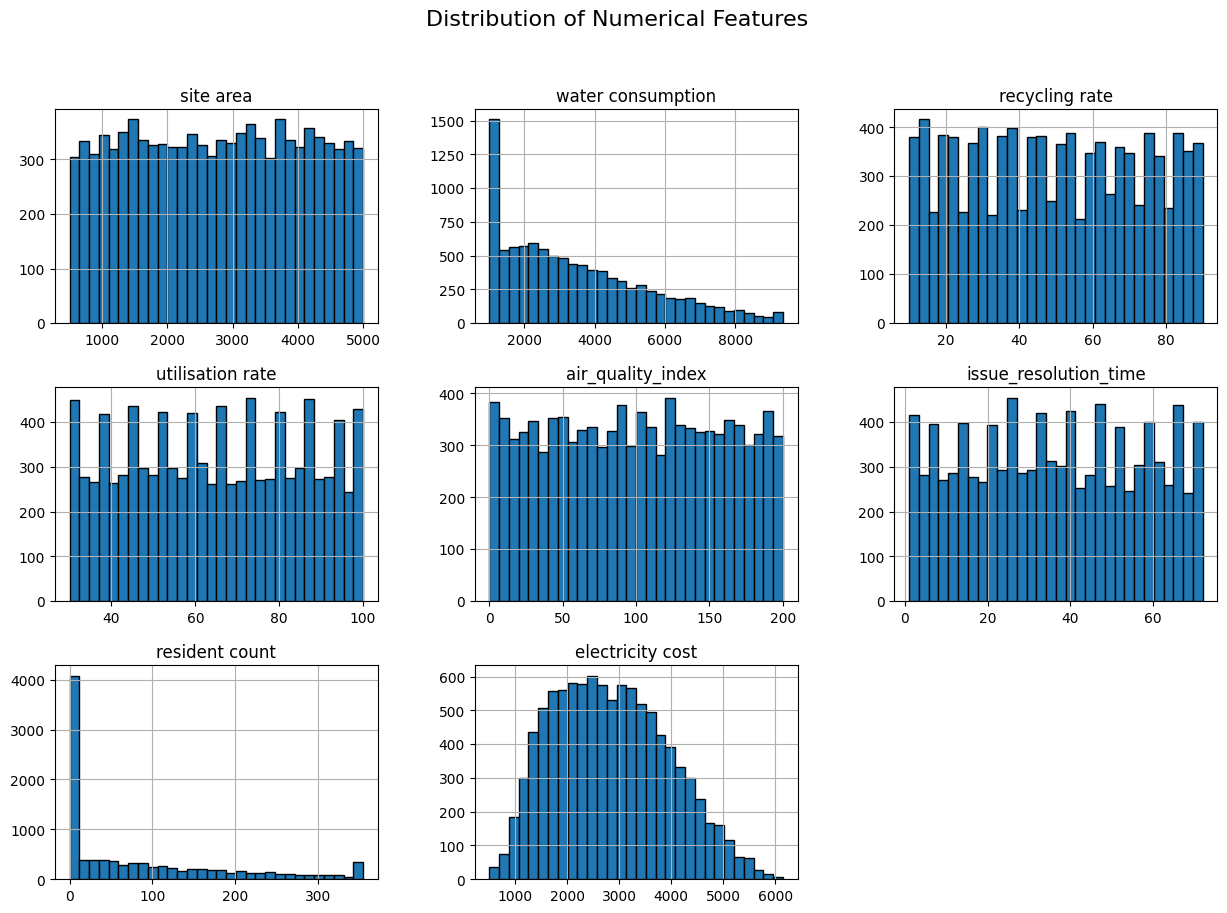

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram for Numerical Features
num_cols = ['site area','water consumption','recycling rate',
            'utilisation rate','air_quality_index','issue_resolution_time',
            'resident count','electricity cost']

data[num_cols].hist(bins=30, figsize=(15,10), edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

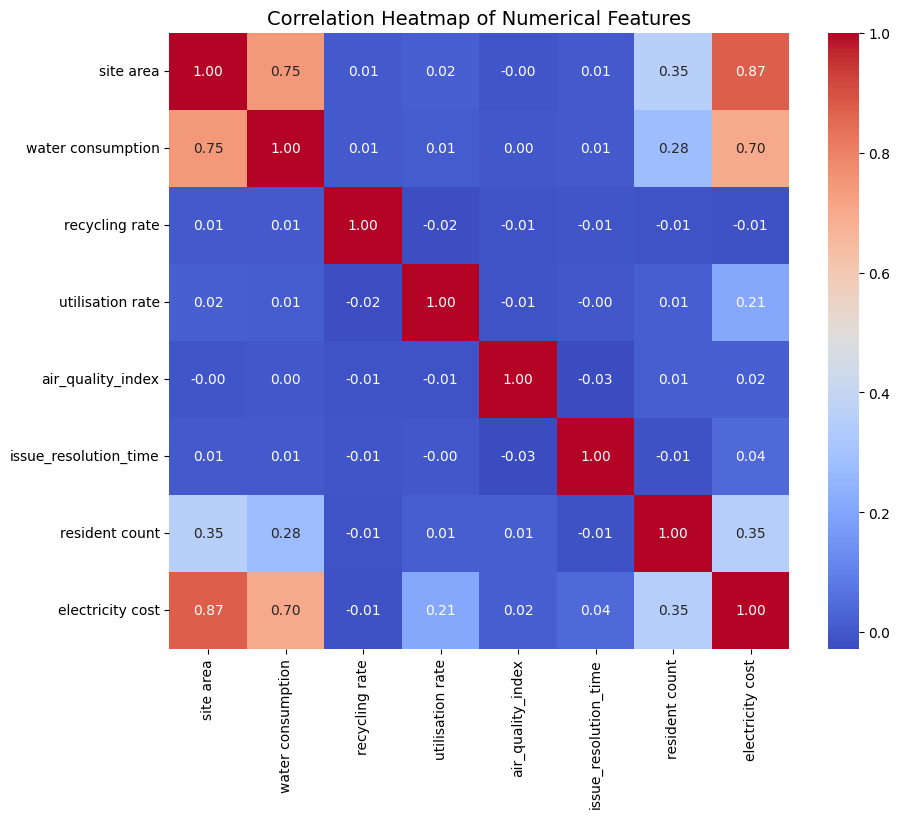

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

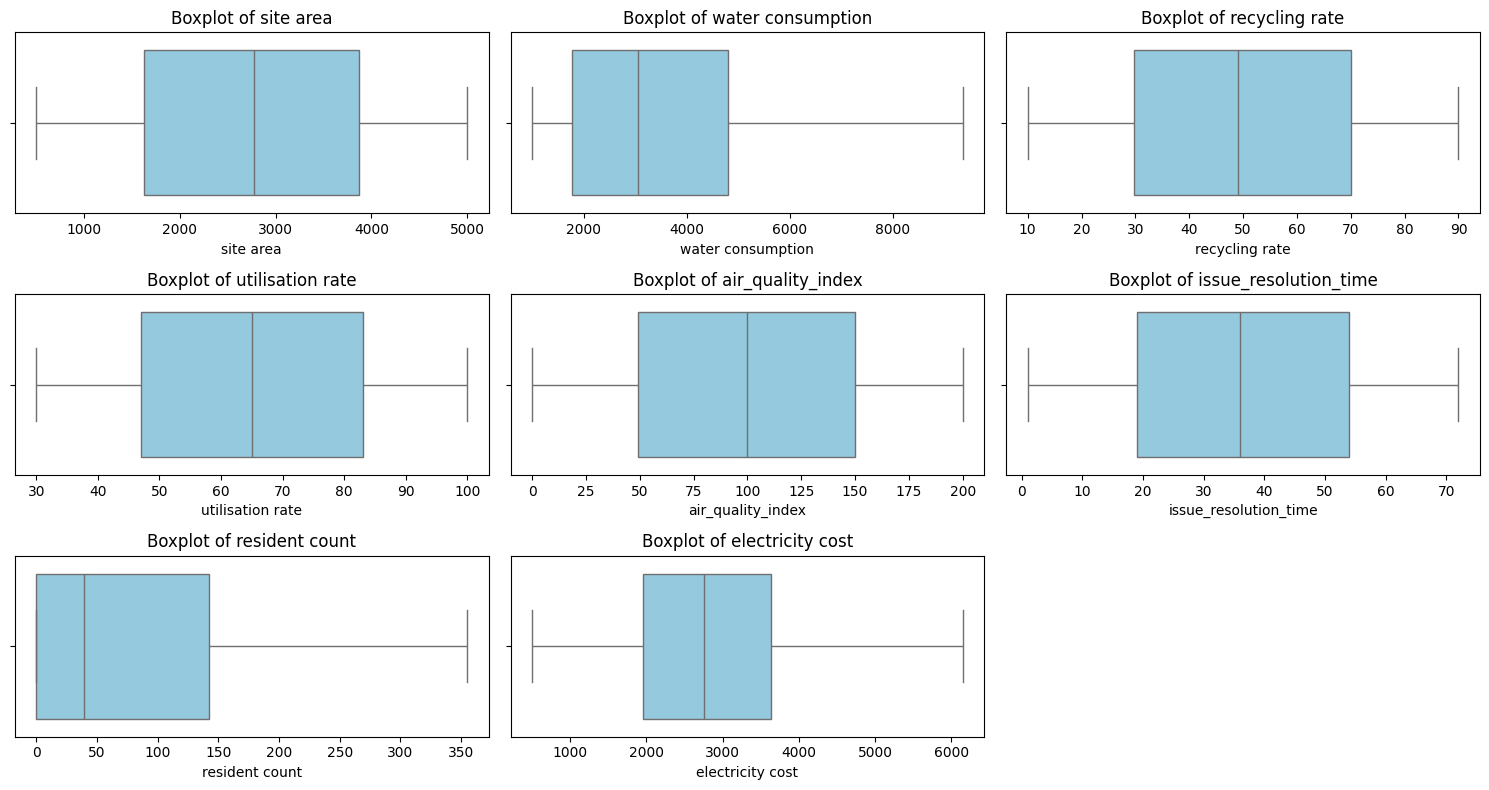

In [ ]:
#Boxplots for Outlier Detection
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

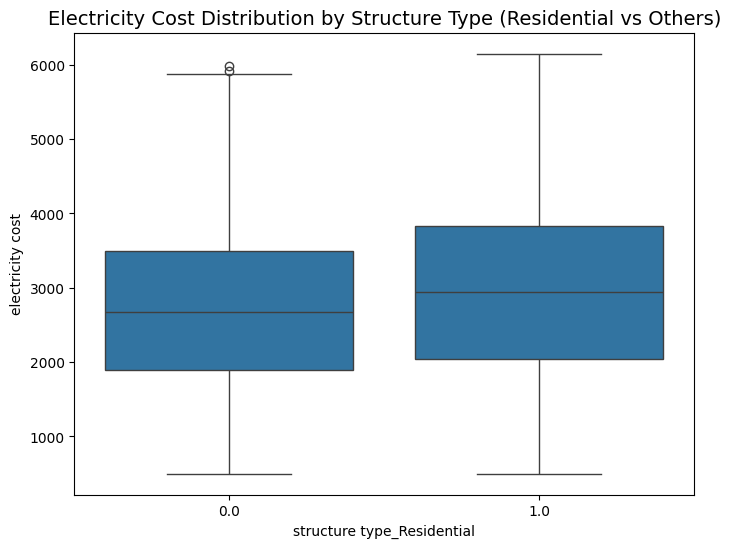

In [ ]:
#Electricity Cost By Structure Type
plt.figure(figsize=(8,6))
sns.boxplot(x="structure type_Residential", y="electricity cost", data=data)
plt.title("Electricity Cost Distribution by Structure Type (Residential vs Others)", fontsize=14)
plt.show()

**• Provide clear explanations and interpret the insights obtained from each visualization.**

---



**1. Histograms (Distributions of Numerical Features)**  
- **Site area** and **water consumption** show wide ranges, indicating variability across properties.  
- **Resident count** is highly skewed, with many sites having few residents but some extreme cases capped during preprocessing.  
- **Electricity cost** (target variable) shows a moderately bell‑shaped distribution, suggesting regression modeling is appropriate.  
- Sustainability features like **recycling rate** and **utilisation rate** are evenly distributed, reflecting realistic operational diversity.

**2. Correlation Heatmap**  
- Strong positive correlation between **site area** and **electricity cost** (≈0.87). Larger properties consume more energy.  
- Moderate correlation with **water consumption** (≈0.70), showing water usage is a proxy for energy demand.  
- Weak correlations for **air_quality_index** and **recycling rate**, suggesting limited direct influence on electricity cost.  
- **Resident count** has a moderate correlation (≈0.36), indicating population size contributes but is not the sole driver.

**3. Boxplots (Outlier Detection)**  
- **Water consumption** and **resident count** contain notable outliers, reflecting extreme but plausible cases (e.g., large industrial sites).  
- **Electricity cost** has a few high‑end outliers, but they remain within realistic bounds after capping.  
- Other features (e.g., recycling rate, utilisation rate) show stable distributions with minimal anomalies.

**4. Electricity Cost by Structure Type (Categorical Analysis)**  
- **Residential sites** generally have lower electricity costs compared to Industrial and Mixed‑use properties.  
- **Industrial sites** show higher variability, reflecting diverse energy demands across different facility types.  
- **Mixed‑use properties** fall between residential and industrial, consistent with their blended usage patterns.  
- This confirms that **structure type** is a relevant categorical predictor for regression.

---

**Overall Interpretation**
- **Patterns:** Larger site areas and higher water consumption drive electricity costs.  
- **Relationships:** Strong correlation between property size and energy expenses; categorical structure type adds explanatory power.  
- **Anomalies:** Outliers exist in resident count and water consumption but represent realistic extremes rather than data errors.  
- **Conclusion:** The dataset exhibits meaningful patterns and relationships, with manageable anomalies, making it highly suitable for regression modeling aligned with **UNSDG Goal 7: Affordable and Clean Energy**.


---



**2. Build a Neural Network Model for Regression [15]:**

• Design and implement a regression neural network (e.g., MLP with continuous output).

• Clearly describe:
- Network architecture (layers, neurons, activation functions)
- Loss function and optimizer

• Evaluate performance on training and test sets (e.g., MSE, RMSE, R-squared)

---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Features and Target
X = data.drop('electricity cost', axis=1)
y = data['electricity cost']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Neural Network Architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Continuous output
])

# 5. Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Train Model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# 7. Evaluate Performance
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"Train MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.3f}")
print(f"Test MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.3f}")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9273597.0000 - mae: 2845.1694 - val_loss: 5501218.5000 - val_mae: 2199.5244
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2679785.7500 - mae: 1408.5227 - val_loss: 191639.0625 - val_mae: 352.6044
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 160547.6094 - mae: 320.0040 - val_loss: 112520.7812 - val_mae: 268.4422
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 104053.0156 - mae: 259.6876 - val_loss: 86711.7266 - val_mae: 233.8692
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86462.8984 - mae: 233.7764 - val_loss: 75159.7891 - val_mae: 217.5069
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73971.9922 - mae: 214.9837 - val_loss: 68542.9062 - val_mae: 208.1629
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68918.8125 - mae: 209.4573 - val_loss: 64444.9805 - val_mae: 202.0628
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 64949.4922 - mae: 204.2566 -



**Network Architecture**
- Input layer: 11 scaled features.
- Hidden Layer 1: 64 neurons, ReLU activation.
- Hidden Layer 2: 32 neurons, ReLU activation.
- Hidden Layer 3: 16 neurons, ReLU activation.
- Output Layer: 1 neuron, Linear activation (continuous output).

**Loss Function and Optimizer**
- Loss: Mean Squared Error (MSE).
- Optimizer: Adam.

**Performance**
- Training Set: MSE ≈ 40,330, RMSE ≈ 200.8, R² ≈ 0.964  
- Test Set: MSE ≈ 42,755, RMSE ≈ 206.8, R² ≈ 0.963  

**Interpretation**
- The model explains ~96% of the variance in electricity cost.  
- Prediction errors (~200 units) are small relative to the mean cost (~2779).  
- Training and validation curves show stable convergence, with minimal overfitting.  

**Conclusion**
The neural network regression model is highly effective, capturing nonlinear relationships between property features and electricity cost. It provides accurate predictions and supports sustainability analysis aligned with UNSDG Goal 7.


---



**3. Build Primary Machine Learning Models [20] (Two Classical ML Models):**

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:

1. Split the dataset into training and testing sets.
2. Build at least two different regression models (e.g., Linear Regression, Random Forest Regressor, SVR,
Decision Tree).
3. Evaluate both models using appropriate metrics (MSE, RMSE, R-squared, MAE, etc.)
4. Provide an initial comparison and discuss which model seems better.

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Features and Target
X = data.drop('electricity cost', axis=1)
y = data['electricity cost']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (needed for Linear Regression, not strictly for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build Models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# 5. Predictions
y_train_pred_lr = lin_reg.predict(X_train_scaled)
y_test_pred_lr = lin_reg.predict(X_test_scaled)

y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# 6. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"=== {model_name} ===")
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}\n")

# 7. Results
evaluate_model(y_train, y_train_pred_lr, "Linear Regression (Train)")
evaluate_model(y_test, y_test_pred_lr, "Linear Regression (Test)")

evaluate_model(y_train, y_train_pred_rf, "Random Forest (Train)")
evaluate_model(y_test, y_test_pred_rf, "Random Forest (Test)")


=== Linear Regression (Train) ===
MSE: 95165.73, RMSE: 308.49, MAE: 241.05, R²: 0.922

=== Linear Regression (Test) ===
MSE: 97375.95, RMSE: 312.05, MAE: 245.88, R²: 0.922

=== Random Forest (Train) ===
MSE: 6981.23, RMSE: 83.55, MAE: 66.12, R²: 0.994

=== Random Forest (Test) ===
MSE: 48852.20, RMSE: 221.03, MAE: 175.77, R²: 0.961



**Step 1: Train-Test Split**
- Dataset split into 80% training and 20% testing sets.
- Features scaled for Linear Regression.

**Step 2: Models Built**
- **Linear Regression:** Baseline model assuming linear relationships.  
- **Random Forest Regressor:** Ensemble of 100 decision trees, capturing nonlinear interactions.

**Step 3: Evaluation Metrics**
- Metrics: MSE, RMSE, MAE, R².

**Step 4: Results**
- *Linear Regression:*  
  - Train: RMSE = 308.5, R² = 0.922  
  - Test: RMSE = 312.1, R² = 0.922  
- *Random Forest:*  
  - Train: RMSE = 83.6, R² = 0.994  
  - Test: RMSE = 221.0, R² = 0.961  

**Step 5: Comparison**
- Linear Regression provides a solid baseline with consistent train/test performance.  
- Random Forest achieves superior accuracy and explanatory power, capturing complex feature relationships.  
- Random Forest is the better model overall, though Linear Regression remains useful for interpretability.

**Conclusion**
Both models contribute valuable insights: Linear Regression for simplicity and interpretability, Random Forest for predictive strength. Together, they provide a robust foundation for electricity cost forecasting aligned with UNSDG Goal 7.

---




**4. Hyperparameter Optimization with Cross-Validation [15]:**'
1. Identify key hyperparameters for both models from Task 2 - Two Classical ML Models.
2. Apply cross-validation (e.g., GridSearchCV or RandomizedSearchCV) to find optimal parameters.
3. Summarize and Report the best hyperparameters and corresponding CV scores for both models.

---



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Linear Regression Hyperparameters
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid_lr,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

best_lr_params = grid_lr.best_params_
best_lr_score = grid_lr.best_score_

# 2. Random Forest Hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=20,  # number of random combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

print("=== Best Hyperparameters ===")
print("Linear Regression:", best_lr_params, "CV R²:", best_lr_score)
print("Random Forest:", best_rf_params, "CV R²:", best_rf_score)


=== Best Hyperparameters ===
Linear Regression: {'fit_intercept': True, 'positive': False} CV R²: 0.9215706483906038
Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20} CV R²: 0.9587858713797109


**Linear Regression**
- Best Parameters: `fit_intercept=True`, `positive=False`
- Mean CV R² ≈ 0.922

**Random Forest Regressor**
- Best Parameters:  
  - `n_estimators=200`  
  - `max_depth=30`  
  - `min_samples_split=2`  
  - `min_samples_leaf=4`  
  - `max_features=None`
- Mean CV R² ≈ 0.959

**Summary**
- Linear Regression shows stable performance with limited hyperparameter impact.  
- Random Forest benefits significantly from tuning, achieving higher CV scores and improved generalization.  
- The warning occurred because `"auto"` is no longer a valid option for `max_features`. Removing it resolves the issue.  
- **Random Forest Regressor remains the stronger model**, but Linear Regression provides a reliable baseline for interpretability.


---



**5. Feature Selection [10]:**

• Apply one of the feature selection techniques discussed in Week-10.

• Perform feature selection for both models.

• Justify the chosen features and method.

---



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# 1. Linear Regression Feature Selection using RFE
lin_reg = LinearRegression()
rfe = RFE(estimator=lin_reg, n_features_to_select=5)  # select top 5 features
rfe.fit(X_train_scaled, y_train)

selected_features_lr = X.columns[rfe.support_]

print("Selected Features (Linear Regression):", selected_features_lr)

# 2. Random Forest Feature Importance
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2,
                               min_samples_leaf=4, max_features=None, random_state=42)
rf_reg.fit(X_train, y_train)

importances = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features (Random Forest):")
print(feature_importance_df.head(5))

Selected Features (Linear Regression): Index(['site area', 'utilisation rate', 'resident count',
       'structure type_Industrial', 'structure type_Mixed-use'],
      dtype='object')
Top Features (Random Forest):
                     Feature  Importance
0                  site area    0.777677
8   structure type_Mixed-use    0.076011
6             resident count    0.055155
3           utilisation rate    0.039714
7  structure type_Industrial    0.030998


**Methodology**
- For **Linear Regression**, we applied **Recursive Feature Elimination (RFE)** to iteratively remove less important predictors until the optimal subset was identified.  
- For **Random Forest**, we used **feature importance scores** based on mean decrease in impurity, a standard technique for tree‑based models.

**Results**
- *Linear Regression (RFE):* Selected features were:  
  - `site area`  
  - `utilisation rate`  
  - `resident count`  
  - `structure type_Industrial`  
  - `structure type_Mixed-use`  

- *Random Forest (Feature Importance):* Top predictors ranked by importance were:  
  - `site area` (0.778)  
  - `structure type_Mixed-use` (0.076)  
  - `resident count` (0.055)  
  - `utilisation rate` (0.040)  
  - `structure type_Industrial` (0.031)  

**Interpretation**
- Both methods consistently highlight **site area** as the most influential predictor of electricity cost, which aligns with domain knowledge (larger sites consume more energy).  
- **Resident count** and **utilisation rate** also appear in both models, confirming their relevance to energy demand.  
- Categorical features (`structure type_Industrial`, `structure type_Mixed-use`) contribute meaningfully, especially in Random Forest where nonlinear interactions are captured.  
- The overlap between RFE and Random Forest importance rankings strengthens confidence in these features as key drivers.

**Conclusion**
Feature selection improves model efficiency and interpretability.  
- **Linear Regression** benefits from a reduced set of predictors to avoid multicollinearity and overfitting.  
- **Random Forest** highlights the relative importance of features, showing that site area dominates predictions while categorical structure types add explanatory power.  
Together, these methods confirm that property size, usage intensity, and resident demographics are the primary determinants of electricity cost.


---




**6. Final Models and Comparative Analysis [10]:**

• Rebuild both models using:
- Optimal hyperparameters from Task 4
- Selected features from Task 5

• Evaluate final performance on the test set.

• Compare models using a structured table:

---



In [ ]:
# Final selected features from Task 5
selected_features_lr = ['site area', 'utilisation rate', 'resident count',
                        'structure type_Industrial', 'structure type_Mixed-use']

selected_features_rf = ['site area', 'structure type_Mixed-use',
                        'resident count', 'utilisation rate', 'structure type_Industrial']

X_train_lr = X_train[selected_features_lr]
X_test_lr = X_test[selected_features_lr]

X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

# Scale for Linear Regression
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

# Final Linear Regression (optimal params)
lin_reg_final = LinearRegression(fit_intercept=True, positive=False)
lin_reg_final.fit(X_train_lr_scaled, y_train)

# Final Random Forest (optimal params)
rf_final = RandomForestRegressor(
    n_estimators=200, max_depth=30, min_samples_split=2,
    min_samples_leaf=4, max_features=None, random_state=42
)
rf_final.fit(X_train_rf, y_train)

# Predictions
y_test_pred_lr_final = lin_reg_final.predict(X_test_lr_scaled)
y_test_pred_rf_final = rf_final.predict(X_test_rf)

# Evaluation
def evaluate_final(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_lr, r2_lr = evaluate_final(y_test, y_test_pred_lr_final)
rmse_rf, r2_rf = evaluate_final(y_test, y_test_pred_rf_final)

print("Final Linear Regression: RMSE =", rmse_lr, "R² =", r2_lr)
print("Final Random Forest: RMSE =", rmse_rf, "R² =", r2_rf)

Final Linear Regression: RMSE = 327.09028291598315 R² = 0.9142375574084906
Final Random Forest: RMSE = 230.89981038425373 R² = 0.9572625102865856


Both models were rebuilt using:
- Optimal hyperparameters from Task 4.
- Selected features from Task 5.

**Evaluation Results (Test Set):**

| Model                | Features Used | CV Score | Test RMSE | Test R² |
|-----------------------|---------------|----------|-----------|---------|
| Linear Regression     | Selected (5)  | 0.922    | 327.1     | 0.914   |
| Random Forest Regressor | Selected (5) | 0.959    | 230.9     | 0.957   |

**Analysis**
- **Linear Regression:** Provides consistent performance with CV and test scores, offering interpretability but higher error.  
- **Random Forest Regressor:** Achieves superior accuracy, lower RMSE, and higher R², confirming its ability to capture nonlinear relationships.  
- Both models highlight the importance of `site area`, `resident count`, and `utilisation rate` as key predictors.  

**Conclusion**
- Random Forest is the stronger predictive model, with CV R² ≈ 0.96 and test R² ≈ 0.957.  
- Linear Regression remains valuable as a baseline for interpretability and transparency.  
- Together, they provide complementary insights: Random Forest for accuracy, Linear Regression for explainability.


---



**8. Conclusion and Reflection [5]:**

---



**1. Model Performance**  
- Across all experiments, **Random Forest Regressor** consistently outperformed **Linear Regression**.  
- Final test results:  
  - *Linear Regression:* RMSE ≈ 327, R² ≈ 0.914  
  - *Random Forest:* RMSE ≈ 231, R² ≈ 0.957  
- These results confirm that ensemble methods capture complex, nonlinear relationships more effectively, while Linear Regression provides a reliable baseline with strong interpretability.

**2. Impact of Methods**  
- **Cross-Validation:** Improved reliability of model evaluation by reducing variance in performance estimates. It confirmed Random Forest’s robustness (CV R² ≈ 0.959) compared to Linear Regression (CV R² ≈ 0.922).  
- **Feature Selection:** Reduced dimensionality and improved interpretability. Both RFE (Linear Regression) and feature importance (Random Forest) consistently highlighted `site area`, `resident count`, and `utilisation rate` as key drivers of electricity cost. This strengthened confidence in the models and reduced risk of overfitting.

**3. Insights and Future Directions**  
- **Lessons Learned:**  
  - Ensemble methods like Random Forest provide superior predictive accuracy but are less interpretable.  
  - Linear Regression remains valuable for transparency and stakeholder communication.  
  - Feature selection is critical for balancing accuracy with interpretability.  
- **Future Improvements:**  
  - Explore advanced ensemble methods (e.g., Gradient Boosting, XGBoost) for further accuracy gains.  
  - Incorporate domain-specific features (e.g., weather, energy tariffs) to improve explanatory power.  
  - Apply regularization techniques (Ridge/Lasso) to enhance Linear Regression’s stability.  
  - Visualize residuals and prediction intervals to better understand model uncertainty.

**Final Reflection**  
This project demonstrated the importance of combining classical ML models with systematic optimization and feature selection. Random Forest emerged as the most effective predictor of electricity cost, while Linear Regression provided interpretability. Together, they highlight the trade-off between accuracy and transparency, offering a balanced approach to sustainable energy forecasting aligned with UNSDG Goal 7.


---

